In [1]:
import DataProvider
prov = DataProvider.DataProvider()

reading helper data on path: ./Data/Helper/backGround_street.wav
reading helper data on path: ./Data/Helper/backGround_noice.wav
reading helper data on path: ./Data/Helper/backGround_nature.wav
[new value of  18
-new value of  41
------new value of  55
-------new value of  57
------new value of  90
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------new value of  93
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------]
[############

In [2]:
import numpy as np
X = list()
y = list()
trainVal = list()

In [3]:
while prov.hasNext(True):
    Xt, yt = prov.next(True)
    for i in range(len(yt)):
        if yt[i] == 1:
            trainVal.append(i+1)
            
    X.append(Xt)
    y.append(yt)

In [4]:
X = np.nan_to_num(np.array(X))
y = np.matrix(y)

X.shape, y.shape

((4816, 93, 25), (4816, 5))

In [5]:
X_train = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
X_train.shape

(4816, 93, 25, 1)

In [6]:
X2 = list()
y2 = list()
actualVal = list()

In [7]:
while prov.hasNext(False):
    X2t, y2t = prov.next(False)
    actualVal.append(y2t)
    
    k = np.zeros(5)
    k[y2t - 1] = 1
    
    X2.append(X2t)
    y2.append(k)

In [8]:
X2 = np.nan_to_num(np.array(X2))
y2 = np.matrix(y2)

X2.shape, y2.shape

((27, 93, 25), (27, 5))

In [9]:
X_test = X2.reshape(X2.shape[0], X2.shape[1], X2.shape[2], 1)
X_test.shape

(27, 93, 25, 1)

In [171]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten,InputLayer,AveragePooling2D
from keras import optimizers

In [180]:
model = Sequential()

In [181]:
model.add(InputLayer(input_shape = (X.shape[1], X.shape[2],1)))

model.add(Conv2D(64, (6,6), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (4,4), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (2,2), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#model.add(Conv2D(128, (3,3), activation="relu"))
#model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(32, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(8, activation="relu"))
model.add(Dense(5, activation='softmax'))

In [182]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 88, 20, 64)        2368      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 44, 10, 64)        0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 44, 10, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 41, 7, 64)         65600     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 20, 3, 64)         0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 20, 3, 64)         0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 19, 2, 64)       

In [183]:
# model.add(Dense(units=256, activation='relu', input_dim = prov.returnSizeOfEverySpectogram()))
# #model.add(Dropout(0.1))
# model.add(Dense(64, activation='relu'))
# #model.add(Dropout(0.2))
# #model.add(Dense(32, activation='relu'))
# #model.add(Dense(256, activation='relu'))
# model.add(Dense(units=5, activation='softmax'))

In [184]:
model.compile(loss='mean_absolute_error',
              optimizer='adam',
              metrics=['accuracy'])

In [195]:
history = model.fit(X_train, y, epochs=25, batch_size=128, verbose=1, validation_split=0.2)

Train on 3852 samples, validate on 964 samples
Epoch 1/25
3852/3852 [==============================] - 14s 4ms/step - loss: 0.1733 - accuracy: 0.5722 - val_loss: 0.1849 - val_accuracy: 0.5415
Epoch 2/25
3852/3852 [==============================] - 13s 3ms/step - loss: 0.1641 - accuracy: 0.5961 - val_loss: 0.1898 - val_accuracy: 0.5218
Epoch 3/25
3852/3852 [==============================] - 13s 3ms/step - loss: 0.1607 - accuracy: 0.6059 - val_loss: 0.1993 - val_accuracy: 0.5010
Epoch 4/25
3852/3852 [==============================] - 13s 3ms/step - loss: 0.1550 - accuracy: 0.6212 - val_loss: 0.1744 - val_accuracy: 0.5674
Epoch 5/25
3852/3852 [==============================] - 13s 3ms/step - loss: 0.1444 - accuracy: 0.6482 - val_loss: 0.1705 - val_accuracy: 0.5747
Epoch 6/25
3852/3852 [==============================] - 12s 3ms/step - loss: 0.1413 - accuracy: 0.6521 - val_loss: 0.1693 - val_accuracy: 0.5830
Epoch 7/25
3852/3852 [==============================] - 12s 3ms/step - loss: 0.1318

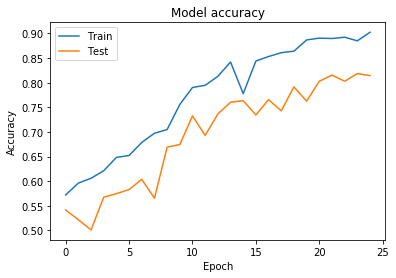

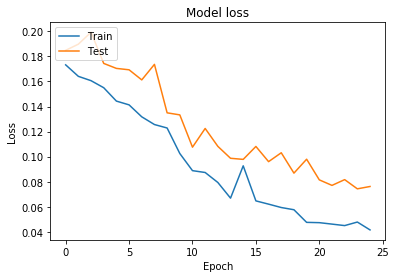

In [196]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [197]:
loss_and_metrics = model.evaluate(X_test, y2, batch_size=128)

27/27 [==============================] - 0s 1ms/step


In [198]:
pred = model.predict(X_test, batch_size=128)

In [199]:
pr = np.argmax(pred, axis=1)+1
pr

array([3, 3, 3, 5, 1, 4, 3, 5, 1, 1, 1, 1, 3, 4, 1, 4, 3, 3, 4, 1, 4, 3,
       5, 2, 5, 5, 2])

In [200]:
correct = [1 if a == b else 0 for (a, b) in zip(pr, actualVal)]
accuracy = (sum(map(int, correct)) / float(len(correct)))
print ("Accuracy: " + str(accuracy * 100) + "%")

Accuracy: 70.37037037037037%


In [201]:
for i in pred:
    count = sum(i)
    for j in range(len(i)):
        i[j] = i[j] / count

In [202]:
import copy
countGrade = copy.deepcopy(actualVal)


In [203]:
for i in range(len(countGrade)):
    ans = actualVal[i]
    countGrade[i] = pred[i][ans-1]

In [204]:
result = sum(countGrade) / len(countGrade)
result

0.7018354221988472